In [5]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

N =  8
t =  1


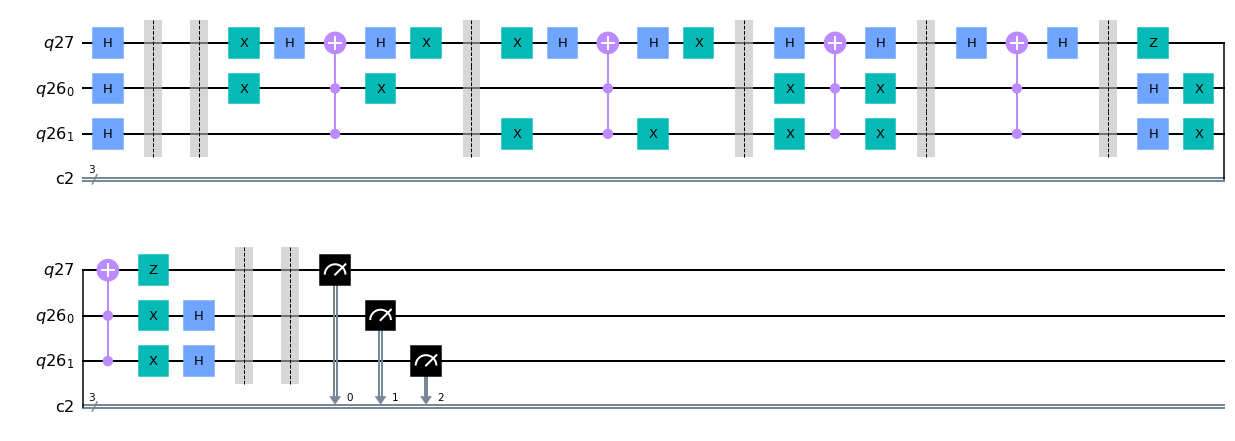

In [6]:
xo = ['001', '010', '100', '111']

n = len(xo[0])
N = 2**n
M = len(xo)

t = int(np.floor(np.pi/4 * np.sqrt(N/M)))
print('N = ', N)
print('t = ', t)

Qc = QuantumRegister(n - 1)
Qt = QuantumRegister(1)

if n > 5:
    Qa = QuantumRegister(1)

C = ClassicalRegister(n)

if n > 5:
    circuito = QuantumCircuit(Qt, Qc, Qa, C)
else:
    circuito = QuantumCircuit(Qt, Qc, C)

circuito.h(Qt)
circuito.h(Qc)
circuito.barrier()
circuito.barrier()

for k in range(t):
    
    for j in range(M):
        if xo[j][0] == '0':
            circuito.x(Qt)

        for m in range(n - 1):
            if xo[j][m + 1] == '0':
                circuito.x(Qc[m])

        circuito.h(Qt)

        if n > 5:
            circuito.mct(Qc, Qt, Qa, mode='advanced')
        else:
            circuito.mct(Qc, Qt, None, mode='advanced')

        circuito.h(Qt)

        if xo[j][0] == '0':
            circuito.x(Qt)

        for m in range(n - 1):
            if xo[j][m + 1] == '0':
                circuito.x(Qc[m])

        circuito.barrier()
    
    circuito.h(Qc)
    circuito.z(Qt)
    circuito.x(Qc)
    
    if n > 5:
        circuito.mct(Qc, Qt, Qa, mode='advanced')
    else:
        circuito.mct(Qc, Qt, None, mode='advanced')
        
    circuito.x(Qc)
    circuito.z(Qt)
    circuito.h(Qc)
    circuito.barrier()

circuito.barrier()
circuito.measure(Qt[0], C[0])

for k in range(n - 1):
    circuito.measure(Qc[k], C[k + 1])

circuito.draw(output='mpl')

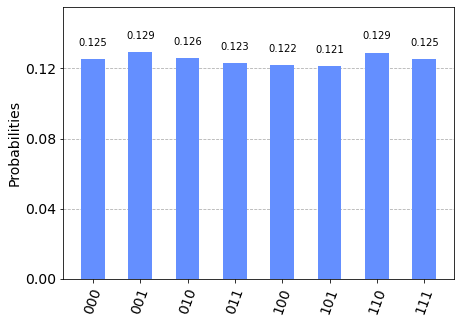

In [7]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=8024)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)